In [47]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
museum = pd.read_csv('./MetObjects.csv')
museum

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (7,8,9,10,11,18,27,28,29,30,31,32,33,34,35,36,37,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Object Name,Title,Culture,Period,Dynasty,...,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Metadata Date,Repository
0,1979.486.1,False,False,1,American Decorative Arts,Coin,One-dollar Liberty Head Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/1,1/21/2019 8:00:00 AM,"Metropolitan Museum of Art, New York, NY"
1,1980.264.5,False,False,2,American Decorative Arts,Coin,Ten-dollar Liberty Head Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/2,1/21/2019 8:00:00 AM,"Metropolitan Museum of Art, New York, NY"
2,67.265.9,False,False,3,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/3,1/21/2019 8:00:00 AM,"Metropolitan Museum of Art, New York, NY"
3,67.265.10,False,False,4,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/4,1/21/2019 8:00:00 AM,"Metropolitan Museum of Art, New York, NY"
4,67.265.11,False,False,5,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/5,1/21/2019 8:00:00 AM,"Metropolitan Museum of Art, New York, NY"
5,67.265.12,False,False,6,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/6,1/21/2019 8:00:00 AM,"Metropolitan Museum of Art, New York, NY"
6,67.265.13,False,False,7,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/7,1/21/2019 8:00:00 AM,"Metropolitan Museum of Art, New York, NY"
7,67.265.14,False,False,8,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/8,1/21/2019 8:00:00 AM,"Metropolitan Museum of Art, New York, NY"
8,67.265.15,False,False,9,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/9,1/21/2019 8:00:00 AM,"Metropolitan Museum of Art, New York, NY"
9,1979.486.3,False,False,10,American Decorative Arts,Coin,Two-and-a-half-dollar Indian Head Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/10,1/21/2019 8:00:00 AM,"Metropolitan Museum of Art, New York, NY"


### We replace all NaN with "unknown", and then put them into a new list

In [48]:
medium=[]
museum=museum.fillna({'Medium':'unknown'})
for i in range(len(museum['Medium'])):
    medium.append(museum['Medium'][i])
medium

['Gold',
 'Gold',
 'Gold',
 'Gold',
 'Gold',
 'Gold',
 'Gold',
 'Gold',
 'Gold',
 'Gold',
 'Gold',
 'Gold',
 'Gold',
 'Gold',
 'Silver',
 'Bronze or copper',
 'Bronze or copper',
 'Bronze or copper',
 'Bronze or copper',
 'Bronze or copper',
 'Bronze or copper',
 'Silver',
 'Silver',
 'Nickel',
 'Nickel',
 'Nickel',
 'Nickel',
 'Nickel',
 'Nickel',
 'Nickel',
 'Nickel',
 'Gold',
 'Pressed glass',
 'Mahogany, laminated',
 'Gold, amethysts, spessartites, tourmalines, fresh water pearls, quartzes, rock crystal, and enamel',
 'Oak, tulip poplar',
 'Earthenware, basalt',
 'Earthenware, basalt',
 'Paper',
 'Pressed glass',
 'Pressed glass',
 'Brass, iron',
 'Brass, iron',
 'Brass',
 'Brass',
 'Brass',
 'Brass',
 'Iron',
 'Iron',
 'Iron',
 'Iron',
 'Bell metal',
 'Bell metal',
 'Bell metal',
 'Bell metal',
 'Iron',
 'Iron',
 'Brass',
 'Brass',
 'Brass, iron',
 'Brass, iron',
 'Brass, iron',
 'Brass, iron',
 'Bell metal, possibly iron',
 'Bell metal, possibly iron',
 'Brass, iron',
 'Brass, ir

### Counts how many times different metals occurs and sort them with order

In [49]:
set_medium=set(medium)
d={}
for item in set_medium:
     d.update({item:medium.count(item)})
summary_statistics_medium = sorted(d.items(), key=lambda x: x[1], reverse=True)
summary_statistics_medium
## Counts different metals occur how many times

[('Terracotta', 23553),
 ('Commercial color lithograph', 23153),
 ('Etching', 16099),
 ('Albumen photograph', 10674),
 ('Engraving', 10589),
 ('Gelatin silver print', 9751),
 ('Silk', 8440),
 ('unknown', 7691),
 ('Bronze', 7313),
 ('Glass', 6666),
 ('Lithograph', 5985),
 ('Film negative', 5894),
 ('Albumen silver print from glass negative', 4995),
 ('Faience', 4887),
 ('silk', 4727),
 ('Silver', 4714),
 ('Woodcut', 4476),
 ('Photolithograph', 4157),
 ('Gold', 3959),
 ('Oil on canvas', 3944),
 ('Polychrome woodblock print; ink and color on paper', 3083),
 ('Commercial color photolithograph', 3062),
 ('Cotton', 2964),
 ('Etching and engraving', 2944),
 ('Wood', 2878),
 ('Commercial photolithograph', 2822),
 ('Albumen silver print', 2820),
 ('Commercial lithograph', 2666),
 ('Instant color print', 2639),
 ('Hard-paste porcelain', 2610),
 ('cotton', 2591),
 ('Porcelain', 2347),
 ('Stone', 2214),
 ('Limestone', 1993),
 ('Ceramic', 1991),
 ('Wood engraving', 1943),
 ('wool', 1918),
 ('Bobbin

### Now we plot the data into bar chart. We found that the meterial Terracotta is the most

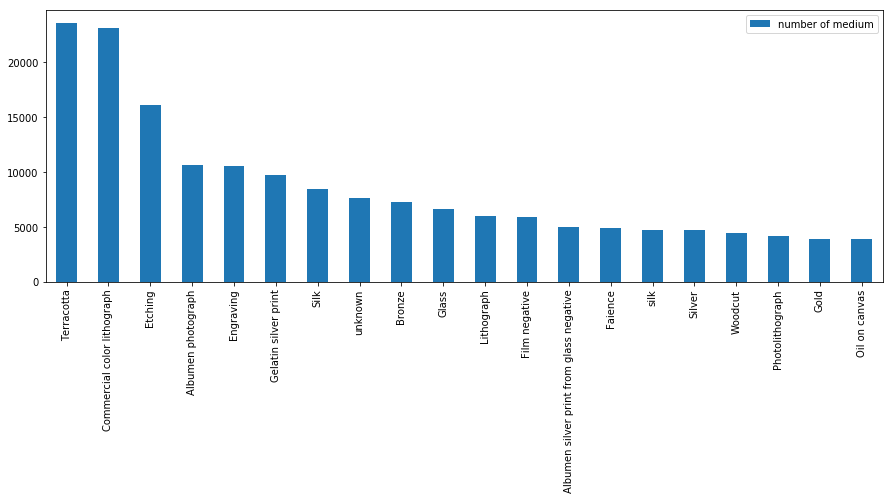

In [53]:
mediums=[]
number=[]
for i in range(20):
    mediums.append(summary_statistics_medium[i][0])
    number.append(summary_statistics_medium[i][1])

df_3=pd.DataFrame(number,mediums,columns=['number of medium'])
df_3.plot(kind='bar',figsize=(15,5))

### Clean the data of region here. Delete those "unknown_place" since they are too many and they are not meaningful

In [58]:
regions=[]
museum=museum.fillna({'Region':'unknown_place'})
for i in range(len(museum['Region'])):
    regex=re.compile(r'\w+')
    a=regex.findall(museum['Region'][i])
    if a==['unknown_place']:
        pass
    else:
        regions.append(''.join(a))

### Counts regions

In [59]:
set_regions=set(regions)
d={}
for item in set_regions:
     d.update({item:regions.count(item)})
summary_statistics_region = sorted(d.items(), key=lambda x: x[1], reverse=True)
summary_statistics_region

[('UpperEgyptThebes', 11502),
 ('MemphiteRegion', 4706),
 ('Mesopotamia', 1993),
 ('Iran', 1766),
 ('Mesoamerica', 1279),
 ('MiddleEgypt', 1278),
 ('NorthernUpperEgypt', 785),
 ('EasternDelta', 554),
 ('Syria', 309),
 ('Levant', 285),
 ('NewEngland', 266),
 ('MidAtlantic', 258),
 ('Anatolia', 222),
 ('BactriaMargiana', 221),
 ('IranorMesopotamia', 218),
 ('Sumatra', 210),
 ('FayumEntranceArea', 209),
 ('SouthernUpperEgypt', 205),
 ('IcaValley', 181),
 ('Fayum', 169),
 ('Nubia', 144),
 ('WashkukHills', 144),
 ('CentralAsiaorIran', 139),
 ('Deccan', 131),
 ('Java', 117),
 ('IranprobablyfromLuristan', 117),
 ('Borneo', 115),
 ('WesternDesertKhargaOasis', 114),
 ('centralCôtedIvoire', 110),
 ('Cyprus', 109),
 ('CentralAsia', 97),
 ('BaffinIsland', 95),
 ('Kashmir', 74),
 ('northernCôtedIvoire', 72),
 ('IranLuristan', 68),
 ('CentralAnatolia', 64),
 ('Midwest', 61),
 ('Bohemia', 58),
 ('Northernregion', 57),
 ('PyrénéesAquintaine', 57),
 ('UpperEgypt', 52),
 ('Caucasus', 52),
 ('WesternIran

### make chart plot. UpperEgyptThebes occurs the most

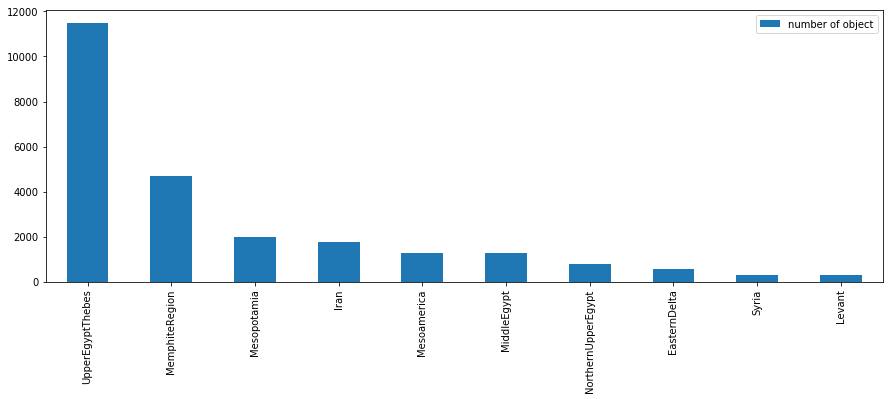

In [60]:
region=[]
number=[]
for i in range(10):
    region.append(summary_statistics_region[i][0])
    number.append(summary_statistics_region[i][1])

df_2=pd.DataFrame(number,region,columns=['number of object'])
df_2.plot(kind='bar',figsize=(15,5))

###  Use bar chart to show the ratio of pubilc and personal

<Figure size 1080x360 with 0 Axes>

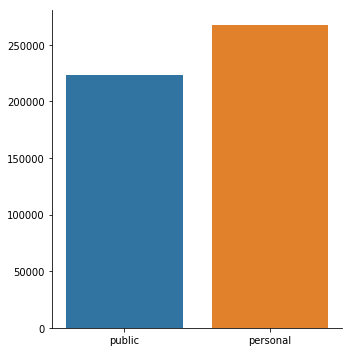

In [61]:
a=museum['Is Public Domain'].value_counts()
data={'public':a[1],'personal':a[0]}
df=pd.DataFrame(data,index=[0])
plt.figure(figsize=(15,5))
sns.catplot(kind="bar", data=df)

### Compare if a stuff highlight or not in bar chart

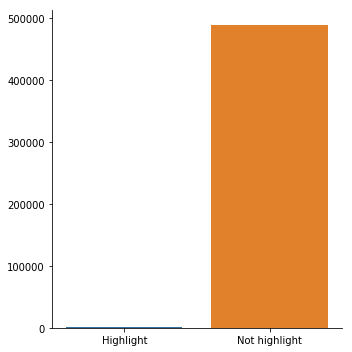

In [46]:
a=museum['Is Highlight'].value_counts()
data={'Highlight':a[1],'Not highlight':a[0]}
df=pd.DataFrame(data,index=[0])
sns.catplot(kind="bar", data=df)